In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

* We can see that we have many missing values.
* And we have 23 columns. (21 if we exclude target feature and RISK_MM)
* We are going to drop RISK_MM because our target feature is based on this feature, like it says in dataset description.
* Date feature needs to be converted to datetime type. Currently it's object.
* And lastly in RainTomorrow column i'll replace No with 0 and Yes with 1. I'll do same to RainToday column too.

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.drop("RISK_MM",axis=1,inplace = True)
df["RainTomorrow"] = [1 if each == "Yes" else 0 for each in df["RainTomorrow"]]
df["RainToday"] = [1 if each == "Yes" else 0 for each in df["RainToday"]]

### **Features and what do they mean**
* Date: The date of observation
* Location: The common name of the lcoation of the weather station
* MinTemp: The minimum temperature in degrees celcius
* MaxTemp: The maximum temperature in degrees celsius
* Rainfall: The amount of rainfall recorded for the day in mm
* Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine: The number of hours of bright sunshine in the day.
* WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am: Direction of the wind at 9am
* WindDir3pm: Direction of the wind at 3pm
* WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am: Humidity (percent) at 9am
* Humidity3pm: Humidity (percent) at 3pm
* Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
* Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* Temp9am: Temperature (degrees C) at 9am
* Temp3pm: Temperature (degrees C) at 3pm
* RainToday: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow: The target variable. Did it rain tomorrow?

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.415065,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


* We have some extreme outliers in Ranfall and Evaporation column, we'll inspect these outliers later.

# Exploratory Data Analysis (EDA)

* First i'll define two functions to visualize categorical and numerical features to target feature. After that i'll look at relations between features.

In [9]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "float64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Other Columns:  ['Date', 'RainToday', 'RainTomorrow']


In [10]:
def ctgplt(variable,to):
    
    "Function for visualization of categorical variables."
    
    var = df[variable]
    values=var.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    g = sns.barplot(x = variable, y = to, data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()
    
    print("{}:\n{}".format(variable,values))

def numplt(data,variable,to):
  
  "Function for visualization of numerical variables."

  c = sns.FacetGrid(data,col=to,height=6)
  c.map(sns.distplot,variable,bins=25)
  plt.show()


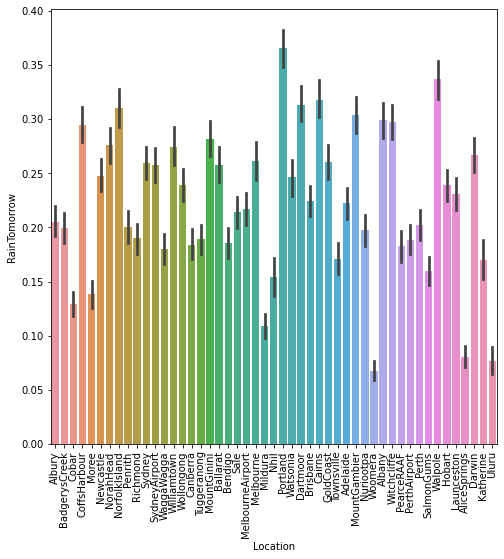

Location:
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek  

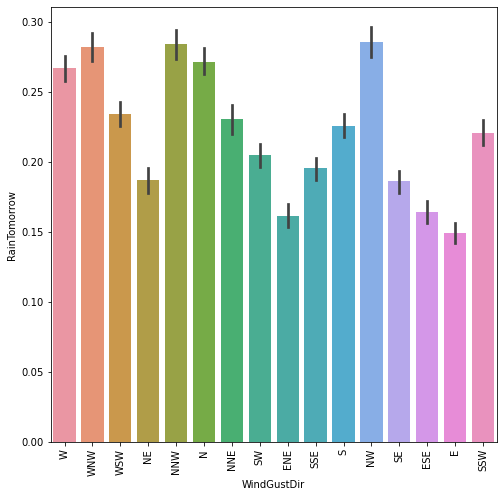

WindGustDir:
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64


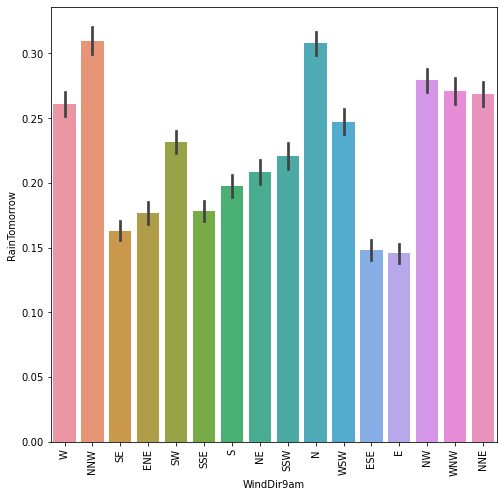

WindDir9am:
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64


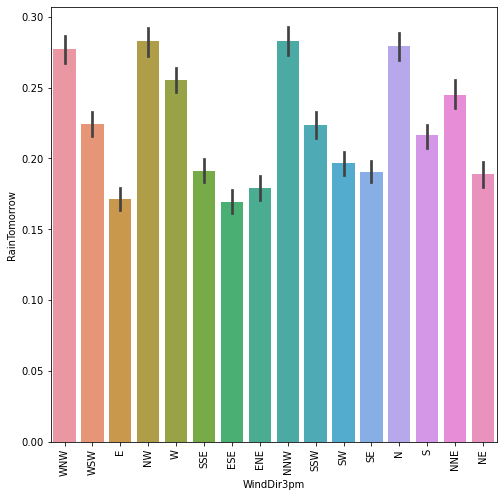

WindDir3pm:
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64


In [11]:
for i in cat_cols:
    ctgplt(i, "RainTomorrow")

* Rain rates for some cities are very low, but most of them are around 0.2.
* Wind is coming from Northwest if its going to rain, mostly.

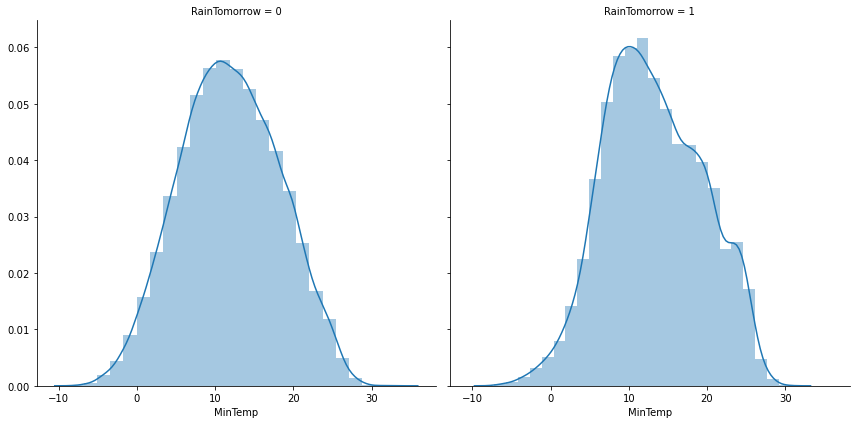

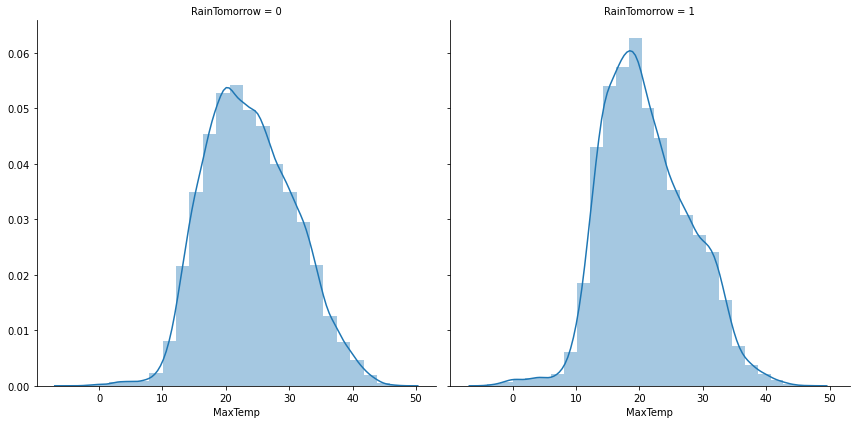

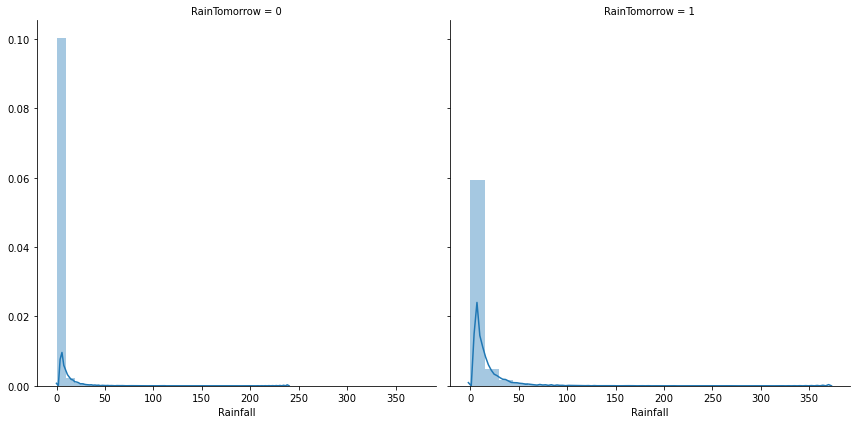

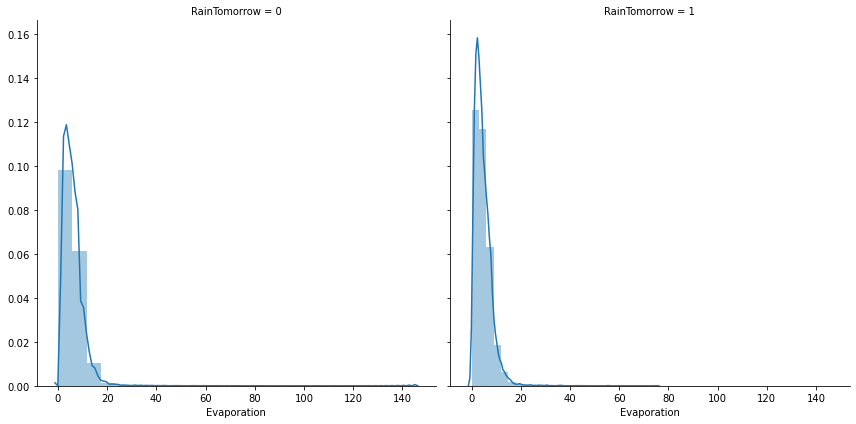

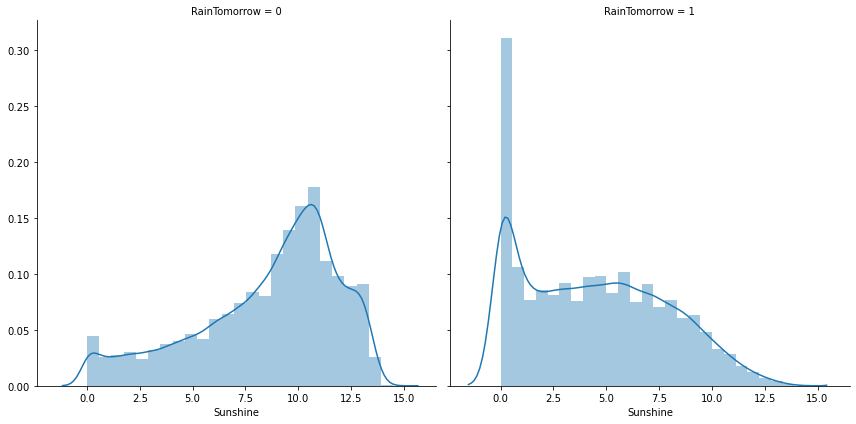

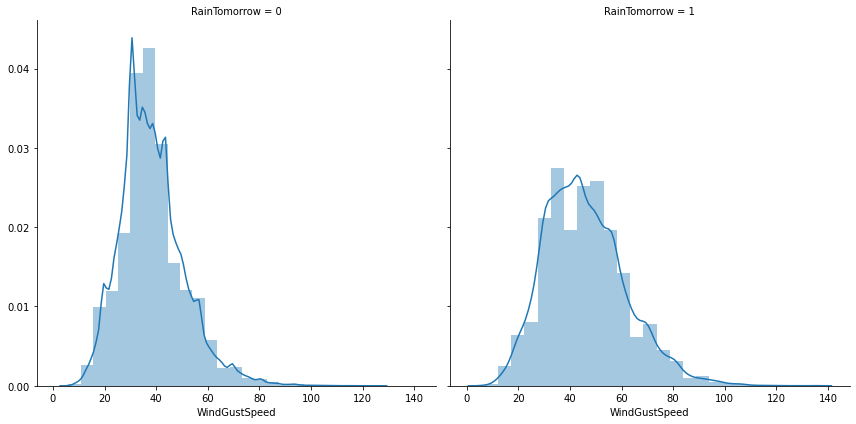

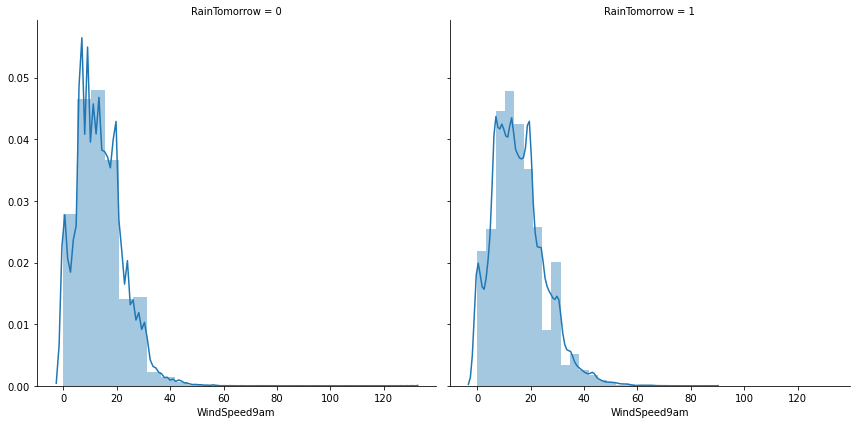

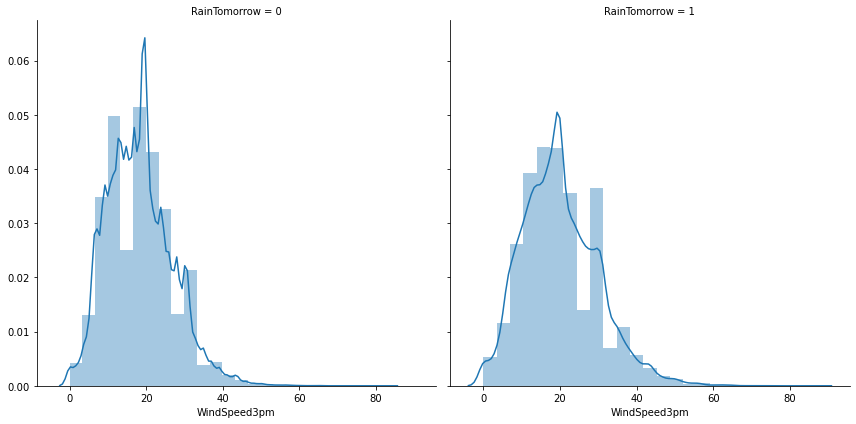

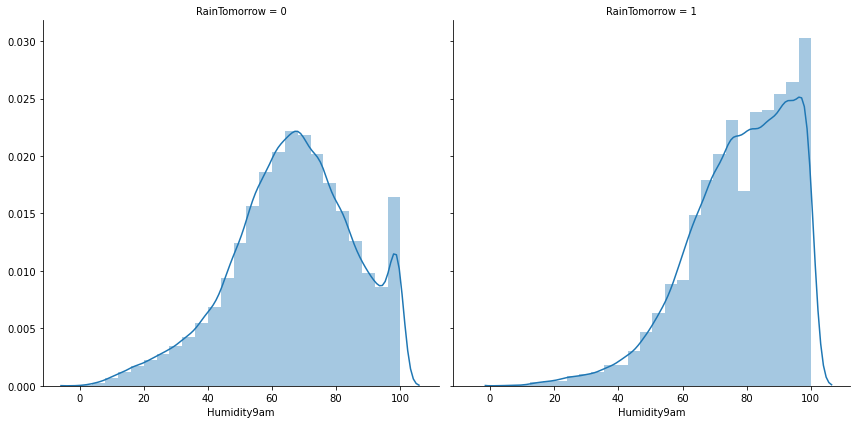

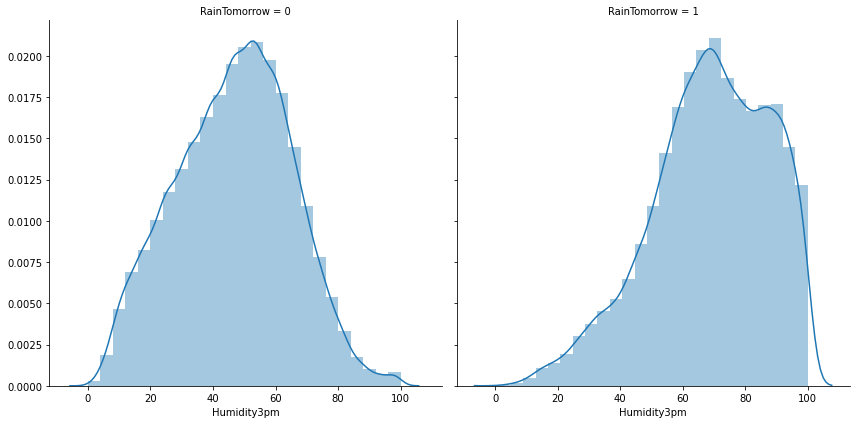

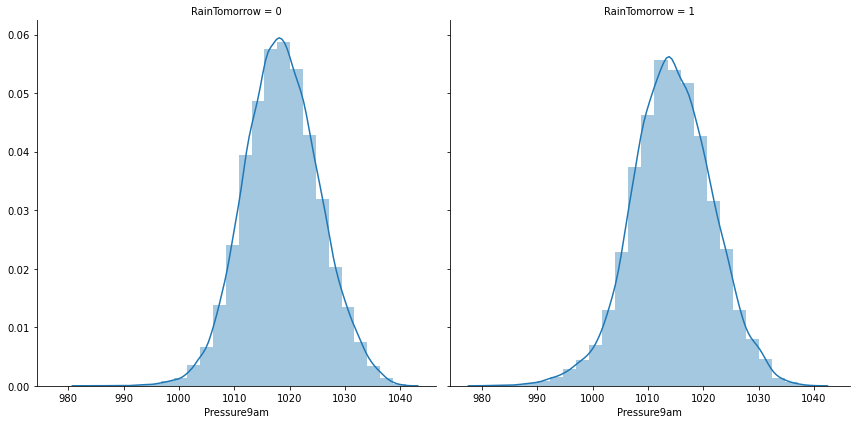

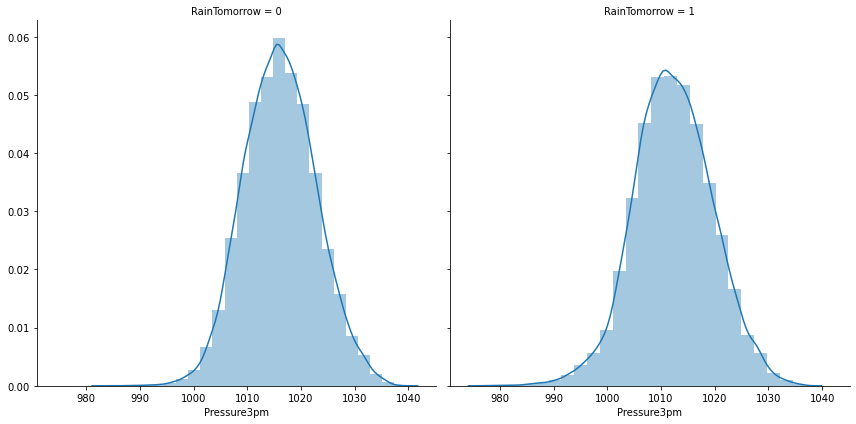

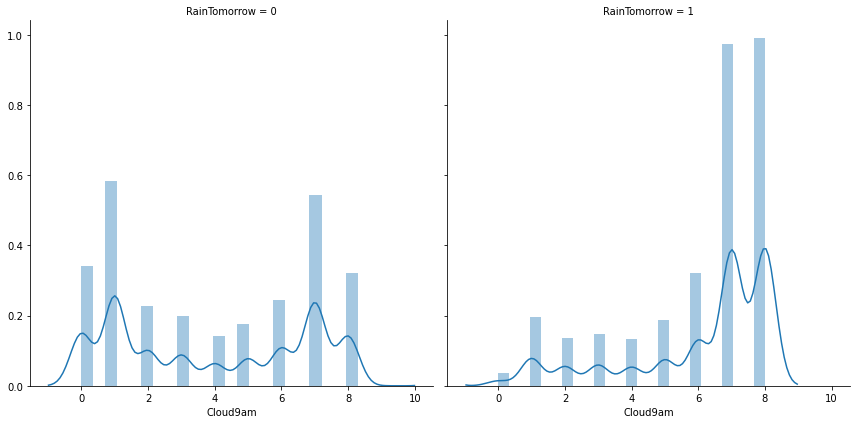

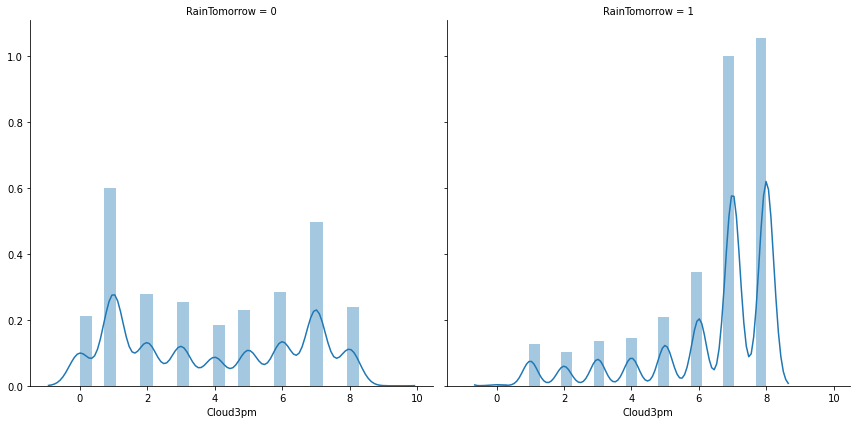

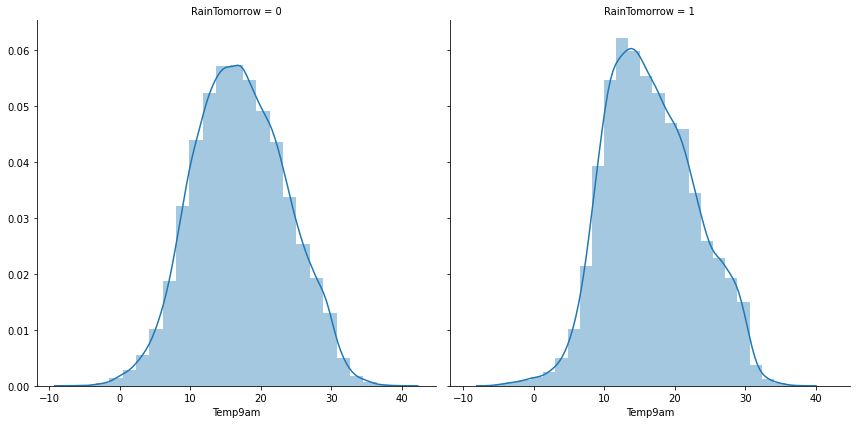

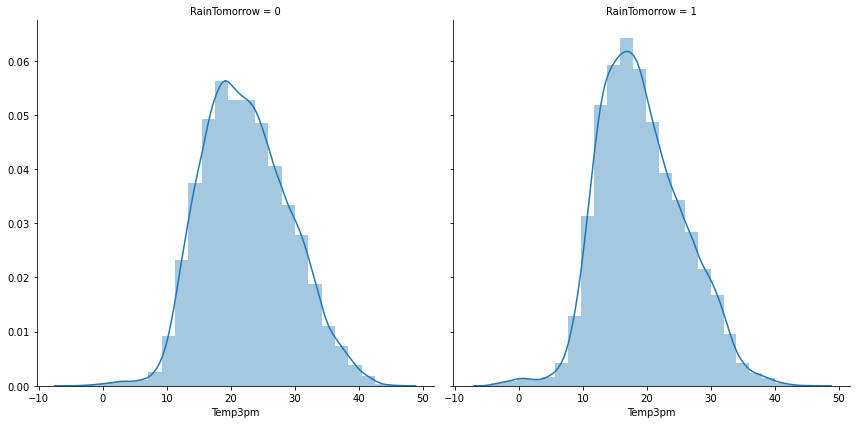

In [12]:
for k in num_cols:
    numplt(df, k, "RainTomorrow")

* Lets look at the graphs and comment the graps:
* MinTemps are nicely distributed around 10 Degrees for RainTomorrow = 0. But for RainTomorrow = 1 its grouped around 15 degrees. And we have some more values around 25 - 30 degrees.
* MaxTemps are stuck at 20 ish degrees for RainTomorrow = 1 and some in 30 - 35 degrees. But we can see that its warmer if tomorrow is a rainy day.
* Like i said before Rainfall and Evaporation has some extreme outliers that makes impossible to commentate the graphs. I'll drop outliers and look at these graphs again.
* Weather is mostly cloudy if its going to rain. (as expected) But no clouds if its not.
* Wind is more distributed for RainTomorrow = 1 it's getting stronger if its going to rain.
* 9 am wind speeds are almost same.
* 3 pm wind speeds are a little bit strongter if its going to rain.
* Humidity is more (as normal) if its going to rain. Especially in early hours of the day.
* Atmospheric pressures distributions are almost same.
* More clouds for rainy days.
* Temperatures are not changed so much, like i said earlier most days grouped around 20 degrees for rainy days.

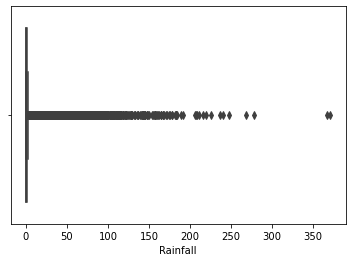

In [13]:
sns.boxplot(x = df["Rainfall"])
plt.show()

* We cant even see the distribution. 

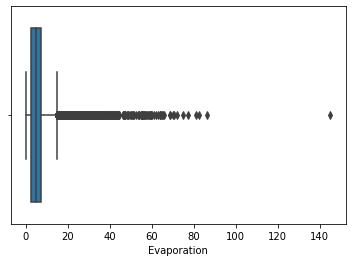

In [14]:
sns.boxplot(x= df["Evaporation"])
plt.show()

* This one is not bad as the Rainfall column but still has some serious outliers.

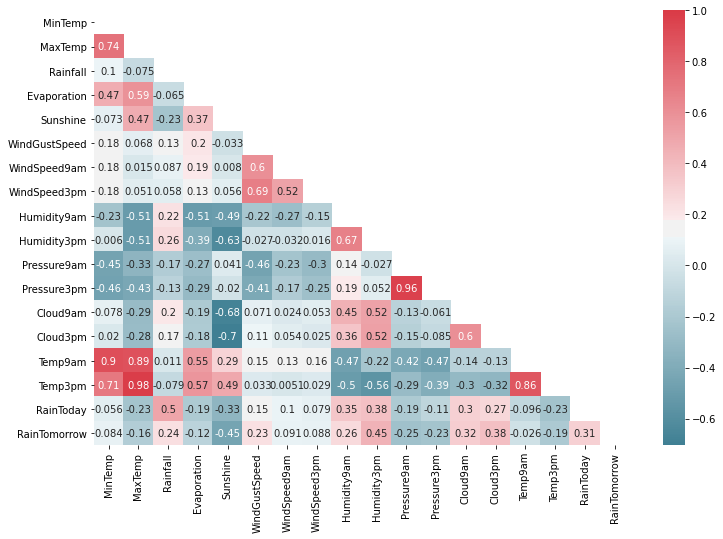

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

* We have some highly correlated features. This collinear features wont do any good to our models. So we need to drop one of them.
* Columns to drop: Temp3pm, Temp9am, Pressure9am. Lets drop these columns and look our correlation matrix again.

In [16]:
df.drop(columns = ["Temp3pm", "Temp9am", "Pressure9am"], axis=1, inplace = True)

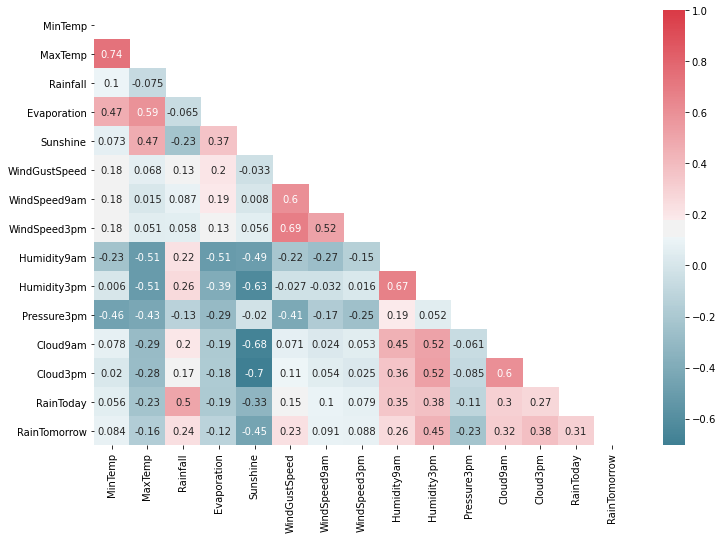

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

* It's looking better now.

In [18]:
# I removed the columns that i just deleted from dataframe.
to_remove = ("Temp3pm", "Temp9am", "Pressure9am")
num_cols = [each for each in num_cols if each not in to_remove]

### Outlier Removal

In [19]:
Q3 = df["Rainfall"].quantile(0.75)
Q1 = df["Rainfall"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["Rainfall"].fillna(1) < (maxm)]

Q3 = df["Evaporation"].quantile(0.75)
Q1 = df["Evaporation"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["Evaporation"].fillna(1) < (maxm)]

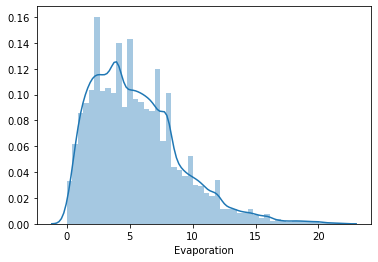

In [20]:
sns.distplot(df["Evaporation"])
plt.show()

* Distribution looks better without outliers.

In [21]:
df["RainTomorrow"].value_counts()

0    99774
1    20881
Name: RainTomorrow, dtype: int64

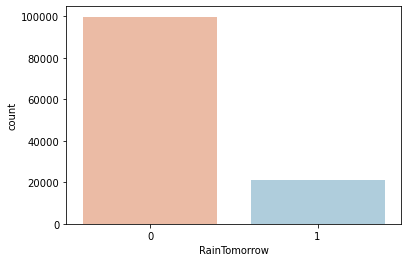

In [22]:
sns.countplot(x = "RainTomorrow", data=df, palette = "RdBu")
plt.show()

* We have a imbalanced data.

### Missing Values

In [23]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [24]:
missing_values_table(df)

,Missing Values,% of Total Values
Sunshine,57521,47.7
Evaporation,51456,42.6
Cloud3pm,49445,41.0
Cloud9am,46526,38.6
Pressure3pm,11926,9.9
WindDir9am,8904,7.4
WindGustDir,7665,6.4
WindGustSpeed,7623,6.3
WindDir3pm,3130,2.6
Humidity3pm,2965,2.5


* Most of the missing value percentages is between 0 - 10.
* Cloud columns, Evaporation and Sunshine features have 40% missing data.
* I will fill categorical variables with mode and numerical variables with median.

In [25]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

for k in num_cols:
    df[k].fillna(df[k].median(),inplace=True)

In [26]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64

* So now that we filled our missing values we can prepare out data for modeling.
* i will drop date column after i seperated it to 3 pieces (year,month,day).
* Label encode the categorical features.
* Min max scale the numerical features.

In [27]:
df["Year"] = df["Date"].dt.year

df["Month"] = df["Date"].dt.month

df["Day"] = df["Date"].dt.day

df.drop("Date",axis=1,inplace=True)

In [28]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.0,9.0,W,44.0,W,WNW,...,71.0,22.0,1007.1,8.0,4.0,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,5.0,9.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1007.8,4.0,4.0,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,5.0,9.0,WSW,46.0,W,WSW,...,38.0,30.0,1008.7,4.0,2.0,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,5.0,9.0,NE,24.0,SE,E,...,45.0,16.0,1012.8,4.0,4.0,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,5.0,9.0,W,41.0,ENE,NW,...,82.0,33.0,1006.0,7.0,8.0,0,0,2008,12,5


In [29]:
le = LabelEncoder()
mms = MinMaxScaler()

for each in cat_cols:
    df[each] = le.fit_transform(df[each])

df[df.columns] = mms.fit_transform(df[df.columns])

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,0.041667,0.516509,0.525292,0.193548,0.229358,0.62069,0.866667,0.294574,0.866667,0.933333,...,0.71,0.22,0.4800,0.888889,0.444444,0.0,0.0,0.1,1.0,0.000000
1,0.041667,0.375000,0.568093,0.000000,0.229358,0.62069,0.933333,0.294574,0.400000,1.000000,...,0.44,0.25,0.4912,0.444444,0.444444,0.0,0.0,0.1,1.0,0.033333
2,0.041667,0.504717,0.579767,0.000000,0.229358,0.62069,1.000000,0.310078,0.866667,1.000000,...,0.38,0.30,0.5056,0.444444,0.222222,0.0,0.0,0.1,1.0,0.066667
3,0.041667,0.417453,0.624514,0.000000,0.229358,0.62069,0.266667,0.139535,0.600000,0.000000,...,0.45,0.16,0.5712,0.444444,0.444444,0.0,0.0,0.1,1.0,0.100000
4,0.041667,0.613208,0.708171,0.322581,0.229358,0.62069,0.866667,0.271318,0.066667,0.466667,...,0.82,0.33,0.4624,0.777778,0.888889,0.0,0.0,0.1,1.0,0.133333


In [31]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
count,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,...,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000,120655.000000
mean,0.494647,0.482842,0.540874,0.075937,0.243562,0.586759,0.481696,0.255483,0.449511,0.506526,...,0.665310,0.487189,0.616597,0.452233,0.459855,0.085450,0.173064,0.576880,0.491034,0.489894
std,0.296632,0.151805,0.137693,0.188440,0.123037,0.184855,0.309860,0.098323,0.298908,0.303225,...,0.187385,0.197431,0.104471,0.251391,0.233648,0.279552,0.378304,0.253922,0.312473,0.293089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.372642,0.439689,0.000000,0.201835,0.606897,0.200000,0.193798,0.200000,0.266667,...,0.550000,0.350000,0.550400,0.333333,0.333333,0.000000,0.000000,0.400000,0.181818,0.233333
50%,0.500000,0.478774,0.531128,0.000000,0.229358,0.620690,0.466667,0.240310,0.400000,0.533333,...,0.670000,0.490000,0.614400,0.444444,0.444444,0.000000,0.000000,0.600000,0.454545,0.500000
75%,0.750000,0.591981,0.638132,0.000000,0.256881,0.634483,0.733333,0.310078,0.666667,0.733333,...,0.800000,0.620000,0.681600,0.666667,0.555556,0.000000,0.000000,0.800000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

* First i will fit a baseline model with logistic regression, then i will use xgboost.

In [36]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print("train_score",lr.score(X_train, y_train))
print("test_score",lr.score(X_test,y_test))

train_score 0.8598897683477684
test_score 0.8608428991753346


In [38]:
cf_matrix = confusion_matrix(y_test, preds)

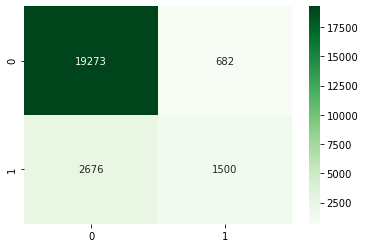

In [56]:
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

In [118]:
xgb = XGBClassifier(objective = "binary:logistic")
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.9020554473498819
0.8757614686502838


* We get a better result with XGBoost but because we did not specify the parameters. Now lets apply Grid Search with xgb classifier.

In [116]:
# I will not use a huge parameter grid because it will took to long to train, so here few parameters that could be useful.
params = {
  'min_child_weight':[1,2],
  'max_depth': [3,5],
  'n_estimators':[200,300],
  'colsample_bytree':[0.7,0.8], 
  'gamma':[0,0.2]    
}

model = GridSearchCV(estimator = XGBClassifier(objective = "binary:logistic"),param_grid = params, cv= StratifiedKFold(n_splits = 5),scoring="accuracy",n_jobs=-1,verbose =3)
model.fit(X_train, y_train)

print("Best Score: ",model.best_score_)
print("Best Estimator: ",model.best_estimator_)

Best Score:  0.8723633220856595
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


* So grid search is did not do better then default parameters. Let's look at the confusion matrix with default parameters.

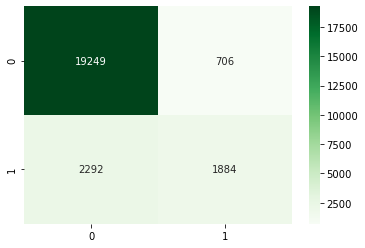

In [130]:
mat = confusion_matrix(y_test,pred)
sns.heatmap(mat,annot=True,cmap="Greens", fmt="g")
plt.show()

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     19955
         1.0       0.73      0.45      0.56      4176

    accuracy                           0.88     24131
   macro avg       0.81      0.71      0.74     24131
weighted avg       0.86      0.88      0.86     24131



* Recall is pretty low because we missclassified most of the zeros as ones. This is caused because of the imbalance.
* I will use over-sampling with imblearn library to overcome this problem.
* To learn what is over-sampling you can read here: https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html
* Other then over-sampling what can we do?
* We could do missing value imputation with KNN or MICE. These both are available in sklearn library. 
* We could do more feature engineering.


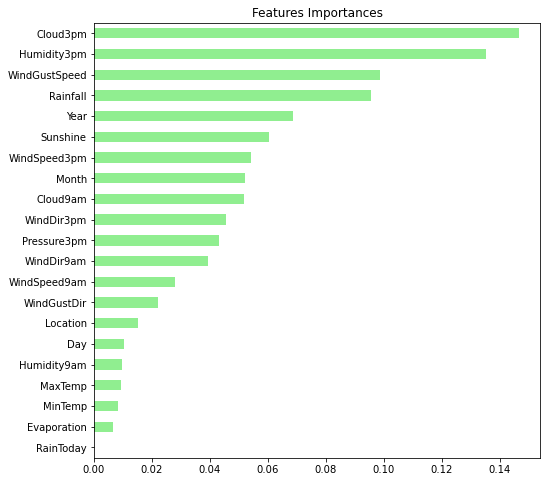

In [144]:
importances = pd.Series(data=xgb.feature_importances_,
                        index= X_train.columns)

importances_sorted = importances.sort_values()
plt.figure(figsize=(8,8))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

* We can see that humidity and clouds are the most important features. But ratios are pretty close to each other.

In [109]:
from imblearn.over_sampling import SMOTE

method = SMOTE()

X_resampled, y_resampled = method.fit_sample(X,y)

In [111]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [132]:
xgb.fit(X_train1,y_train1)
pred1 = xgb.predict(X_test1)
print("Train Score: ",xgb.score(X_train1,y_train1))
print("Test Score: ",xgb.score(X_test1,y_test1))

Train Score:  0.9334556935065585
Test Score:  0.9231520922074667


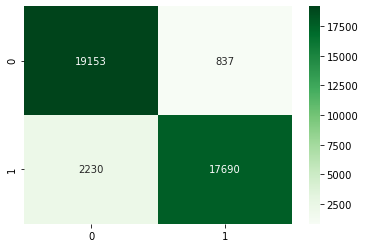

In [136]:
mat = confusion_matrix(y_test1,pred1)
sns.heatmap(mat,annot=True,cmap="Greens", fmt="g")
plt.show()

In [135]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     19990
         1.0       0.95      0.89      0.92     19920

    accuracy                           0.92     39910
   macro avg       0.93      0.92      0.92     39910
weighted avg       0.93      0.92      0.92     39910



* As you can see with oversampling accuracy passed 90%.
* And our recall and f1-score is now much better.

### ** That's all. Thank you for reading, i hope you like it. **